# O Problema do Caxeiro Viajante
<b>SME0110 - Programação Matemática || Bach. Ciências de Computação || ICMC/USP<br>
Alunos: João Garcia Coelho (10349540) & Matheus AParecido do Carmo Alves (9791114)</b>

Este projeto tem como propostao estudar e implementar o modelo para resolução do problema do caixeiro viajante com as restrições de eliminação de sub-rotas do tipo MTZ (Otimização Inteira Mista).

Para a realização de testes e estudo, será utilizado o conjunto de dados <a href='https://wwwproxy.iwr.uni-heidelberg.de/groups/comopt/software/TSPLIB95/tsp/burma14.tsp.gz'>Burma14</a> e outras três <a href='http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/index.html'>instâncias disponíveis</a>,  sendo elas: "ulysses16", "bays29" e "berlin52".

## 1. Instalando e carregando pacotes necessários

Primeiramente, iremos instalar (caso necessário) e incluir os pacotes necessários para a execução do projeto.
Serão eles:
<ul>
    <li><b>JuMP</b>: Pacote de modelos para otimização matemática em Julia.</li>
    <li><b>CBC</b>: Pacote para programação linear em Julia.</li>
    <li><b>Distances</b>: Pacote para calculo de distâncias em Julia.</li>
    <li><b>Plots e Graphs Recipes</b>: Pacotes para desenhar o grafo montado.</li>
    <li><b>LightGraphs e SimpleWeightedGraphs</b>: Pacotes para montar grafos.</li>
</ul>

Para isso, usamos o seguintes comandos:

In [1]:
# Installing the packages
using Pkg
#Pkg.add("JuMP")
#Pkg.add("Cbc")
#Pkg.add("Distances")
#Pkg.add("Plots")
#Pkg.add("GraphRecipes")
#Pkg.add("LightGraphs")
#Pkg.add("SimpleWeightedGraphs")

# Including the packages
using JuMP, Distances, Plots, GraphRecipes, LightGraphs, SimpleWeightedGraphs, Cbc

Agora, vamos a resolução dos problemas do caixeiro viajante. 

## 2. Resolvendo o TSP

Nesta seção iremos apresentar a solução <b>heurística</b> e <b>otimizada</b> para o prolema do caxeiro viajante para o dataset <i>Burma14</i>.

A resolução está estruturada apresentando primeiro a solução heurística seguida da solução por programação linear.

Ao final desta seção, generalizações para os métodos serão apresentadas visando a aplicação nos outros 3 datasets sugeridos.

### Burma14 - Pre-processamento

Para iniciar a resolução, vamos carregar o arquivo de estudo para construção do problema.

In [2]:
file_name = "burma14.txt"

# 1. Carregando o arquivo de estudo
file = open("./" * file_name);
lines = readlines(file)
N = length(lines)

println("Numero de nós: ", N)

Numero de nós: 14


Com o arquivo carregado, iremos formatar os dados, transformando seus tipos para facilitar a manipulação.

O primeiro passo é extrair as informações do arquivo de entrada que possui, linha a linha, as coordenadas dos nós:

In [3]:
# 2. Extraindo as informações do arquivo de entrada
c = [Vector{Float64}(undef, 2) for _ in 1:N]

for i = 1:N
    x, y = split(lines[i],',')
    c[i] = [parse(Float64, x), parse(Float64, y)]
end

Extraída as informações, iremos calcular a matriz de distâncias para o TSP.

In [4]:
# 3. Calculando a matriz de distancias
dist_mat = zeros(N,N)
for i=1:N, j=i+1:N
    d = euclidean(c[i],c[j])
    dist_mat[i,j] = d
    dist_mat[j,i] = d
end

Podemos visualizar a rede a qual estamos trabalhando da seguinte forma:

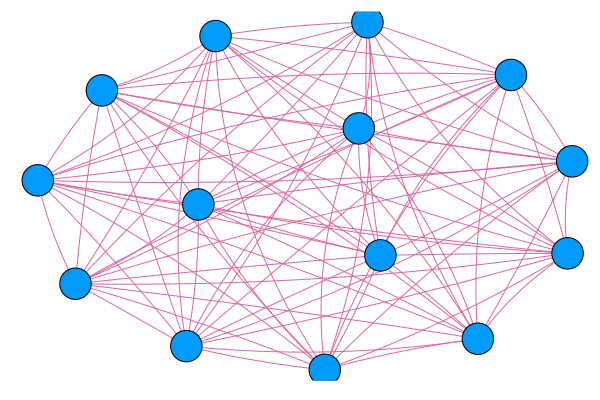

In [5]:
# 4. Plotando o grafo do problema
g = WGraph(N)
for i = 1:N
    for j = i+1:N
        add_edge!(g, i, j, dist_mat[i,j])
    end
end
graphplot(g)

Realizado este processo de processamento, partimos para a resolução do problema.

## Burma14 - Resolução Heurística

A primeira resolução sugerida será heurística.

Nesta heurística é definido que <b>o caminho mais próximo será o escolhido</b> para constituir a solução, iteração a iteração.

Para tornar a comparação um pouco mais "justa", iremos realizar a aplicação da heurística partindo de todos os nós.

In [6]:
# Realizando a aplicação da heurística para resolução do problema
println("=====")
s = zeros(N)
for i=1:N
    # copiando a matriz de distancias
    dist_mat_h = zeros(N,N)
    for i=1:N
        for j=1:N
            dist_mat_h[i,j] = dist_mat[i,j]
        end
    end
    
    # procurando pela solução
    cur_node = i
    visits = union(cur_node)
    while N != length(visits)
        # procurando o menor distância
        min_dist = 99999
        for j=1:N
            if min_dist > dist_mat_h[cur_node,j] && dist_mat_h[cur_node,j] != 0
                min_dist = dist_mat_h[cur_node,j]
            end
        end
        
        # procurando o proximo nó
        dest = -1
        for j=1:N
            if min_dist == dist_mat_h[cur_node,j]
                dest = j
                break
            end
        end
        
        # atualizando os valores na matriz e a solução
        s[i] = s[i] + dist_mat_h[cur_node,dest]
        dist_mat_h[cur_node,dest] = 99999
        dist_mat_h[dest,cur_node] = 99999
        
        # partindo para o proximo no
        cur_node = dest
        visits = union(visits,cur_node)
    end
    s[i] = s[i] + dist_mat[cur_node,i]
    println("Nó de partida: ",i," - Distância: ",s[i])
end 
min_h = minimum(s[1:N])
println("=====")
println("Melhor distância: ", min_h)

=====
Nó de partida: 1 - Distância: 154.97477928150658
Nó de partida: 2 - Distância: 150.91926150869435
Nó de partida: 3 - Distância: 73.4244456586358
Nó de partida: 4 - Distância: 130.0588459157503
Nó de partida: 5 - Distância: 40.20673056597448
Nó de partida: 6 - Distância: 73.89782298159534
Nó de partida: 7 - Distância: 156.48681194820236
Nó de partida: 8 - Distância: 110.37326769273587
Nó de partida: 9 - Distância: 167.7886722407509
Nó de partida: 10 - Distância: 157.34164011830575
Nó de partida: 11 - Distância: 155.06769130259192
Nó de partida: 12 - Distância: 67.1513415460658
Nó de partida: 13 - Distância: 148.6469348961849
Nó de partida: 14 - Distância: 169.38893874497253
=====
Melhor distância: 40.20673056597448


## Burma14 - Resolução por MTZ

Para garantir uma melhor solução ao problema, é proposto agora a implementação do método de programação inteira mista MTZ.

A solução é apresentada a seguir.

In [7]:
# Realizando a otimização inteira mista - MTZ
m = Model(with_optimizer(Cbc.Optimizer, logLevel=1))

@variable(m, x[1:N,1:N], Bin)
@variable(m, u[1:N], Int)
@objective(m, Min, sum(x[i,j]*dist_mat[i,j] for i=1:N,j=1:N))
for i=1:N 
    @constraint(m, x[i,i] == 0)
    @constraint(m, sum(x[i,1:N]) == 1)
end
for j=1:N
    @constraint(m, sum(x[1:N,j]) == 1)
end
for f=1:N, t=1:N
    @constraint(m, x[f,t]+x[t,f] <= 1)
end
for i = 2:N
    @constraint(m, u[i] >= 2)
end
for i = 2:N, j = 2:N
    if i != j
        @constraint(m, u[i] - u[j] + N*x[i,j] <= N-1)
    end 
end
redirect_stdout((()->optimize!(m)),open("./null", "w"))
min_mtz = JuMP.objective_value(m)
println("Resultado da função objetivo: ", min_mtz)

Resultado da função objetivo: 30.878503892587997


## Burma14 - Conclusão

Analisando os resultados temos que a aplicação da otimização MTZ melhorou o resultado significativamente.
Isto deve ocorrer devido ao fato das restrições conseguirem encurtarem "loops" na soluções, além de terem garantia de otimalidade.

Podemos visualizar numéricamente o resultado por:

In [8]:
println("Diferença absoluta entre os resultados (heuristico - mtz): ",min_h - min_mtz)
println("Diferença relativa entre os resultados (heuristico - mtz): ",(min_h - min_mtz)/(min_h))

Diferença absoluta entre os resultados (heuristico - mtz): 9.328226673386485
Diferença relativa entre os resultados (heuristico - mtz): 0.23200659546490532


Portanto, podemos concluir que a solução por MTZ gerou um ganho de 23% em sua aplicação sobre a resolução heuristica em seu melhor caso.

# 2. Generalização do Código

Vizando generalizar o código para resolução de qualquer dataset, podemos criar as seguintes funções para execução da otimização do problema do caixeiro viajante por heurística ou pela aplicação do MTZ.

O código heuristico é implementado da seguinte forma:

In [9]:
function tsp_h(file_name)
    # 1. Carregando o arquivo de estudo
    file = open(file_name);
    lines = readlines(file)
    N = length(lines)
    println("Numero de nós: ", N)
    
    # 2. Extraindo as informações do arquivo de entrada
    c = [Vector{Float64}(undef, 2) for _ in 1:N]
    for i = 1:N
        x, y = split(lines[i],',')
        c[i] = [parse(Float64, x), parse(Float64, y)]
    end
    
    # 3. Calculando a matriz de distancias
    dist_mat = zeros(N,N)
    for i=1:N, j=i+1:N
        d = euclidean(c[i],c[j])
        dist_mat[i,j] = d
        dist_mat[j,i] = d
    end
    
    # 4. Plotando o grafo do problema
    g = WGraph(N)
    for i = 1:N
        for j = i+1:N
            add_edge!(g, i, j, dist_mat[i,j])
        end
    end
    graphplot(g)
    
    # 5. Realizando a otimização inteira mista - MTZ
    # Realizando a aplicação da heurística para resolução do problema
    println("=====")
    s = zeros(N)
    for i=1:N
        # copiando a matriz de distancias
        dist_mat_h = zeros(N,N)
        for i=1:N
            for j=1:N
                dist_mat_h[i,j] = dist_mat[i,j]
            end
        end

        # procurando pela solução
        cur_node = i
        visits = union(cur_node)
        while N != length(visits)
            # procurando o menor distância
            min_dist = 99999
            for j=1:N
                if min_dist > dist_mat_h[cur_node,j] && dist_mat_h[cur_node,j] != 0
                    min_dist = dist_mat_h[cur_node,j]
                end
            end

            # procurando o proximo nó
            dest = -1
            for j=1:N
                if min_dist == dist_mat_h[cur_node,j]
                    dest = j
                    break
                end
            end

            # atualizando os valores na matriz e a solução
            s[i] = s[i] + dist_mat_h[cur_node,dest]
            dist_mat_h[cur_node,dest] = 99999
            dist_mat_h[dest,cur_node] = 99999

            # partindo para o proximo no
            cur_node = dest
            visits = union(visits,cur_node)
        end
        s[i] = s[i] + dist_mat[cur_node,i]
        println("Nó de partida: ",i," - Distância: ",s[i])
    end 
    min_h = minimum(s[1:N])
    println("=====")
    println("Melhor distância: ", min_h)
    
end

tsp_h (generic function with 1 method)

Já o código do MTZ fica:

In [10]:
function tsp_mtz(file_name)
    # 1. Carregando o arquivo de estudo
    file = open(file_name);
    lines = readlines(file)
    N = length(lines)
    println("Numero de nós: ", N)
    
    # 2. Extraindo as informações do arquivo de entrada
    c = [Vector{Float64}(undef, 2) for _ in 1:N]
    for i = 1:N
        x, y = split(lines[i],',')
        c[i] = [parse(Float64, x), parse(Float64, y)]
    end
    
    # 3. Calculando a matriz de distancias
    dist_mat = zeros(N,N)
    for i=1:N, j=i+1:N
        d = euclidean(c[i],c[j])
        dist_mat[i,j] = d
        dist_mat[j,i] = d
    end
    
    # 4. Plotando o grafo do problema
    g = WGraph(N)
    for i = 1:N
        for j = i+1:N
            add_edge!(g, i, j, dist_mat[i,j])
        end
    end
    graphplot(g)
    
    # 5. Realizando a otimização inteira mista - MTZ
    m = Model(with_optimizer(Cbc.Optimizer, logLevel=1))

    @variable(m, x[1:N,1:N], Bin)
    @variable(m, u[1:N], Int)
    @objective(m, Min, sum(x[i,j]*dist_mat[i,j] for i=1:N,j=1:N))
    for i=1:N 
        @constraint(m, x[i,i] == 0)
        @constraint(m, sum(x[i,1:N]) == 1)
    end
    for j=1:N
        @constraint(m, sum(x[1:N,j]) == 1)
    end
    for f=1:N, t=1:N
        @constraint(m, x[f,t]+x[t,f] <= 1)
    end
    for i = 2:N
        @constraint(m, u[i] >= 2)
    end
    for i = 2:N, j = 2:N
        if i != j
            @constraint(m, u[i] - u[j] +N*x[i,j] <= N-1)
        end 
    end
    
    redirect_stdout((()->optimize!(m)),open("./null", "w"))
    println("Resultado da função objetivo: ", JuMP.objective_value(m))
    
end

tsp_mtz (generic function with 1 method)

Como já possuímos a função genérica, podemos verificar facilmente a solução de outros datasets a partir desta.

Assim, iremos aplicar estes métodos sobre os outros 3 datasets mencionados na introdução.

Pensando em questões de teste, os datasets apresentam uma ordem crescente do número de nós para que possamos analisar o desempenho com o aumento de nós em um grafo para se encontrar a solução ótima ou heurística.

# 3. Aplicação em outros datasets

## A. Ulysses16

In [11]:
println("|| A. SOLUÇÃO HEURISTICA |||||||||||||||")
@time tsp_h("./ulysses16.txt")
println("\n|| B. SOLUÇÃO POR MTZ    |||||||||||||||")
@time tsp_mtz("./ulysses16.txt")

|| A. SOLUÇÃO HEURISTICA |||||||||||||||
Numero de nós: 16
=====
Nó de partida: 1 - Distância: 576.1155524849684
Nó de partida: 2 - Distância: 735.360848973259
Nó de partida: 3 - Distância: 733.3874725078753
Nó de partida: 4 - Distância: 581.3349815469886
Nó de partida: 5 - Distância: 556.6001593237606
Nó de partida: 6 - Distância: 611.5632018480151
Nó de partida: 7 - Distância: 560.520391960864
Nó de partida: 8 - Distância: 576.0546164017121
Nó de partida: 9 - Distância: 555.0908462944767
Nó de partida: 10 - Distância: 614.5498477294522
Nó de partida: 11 - Distância: 189.66992617718512
Nó de partida: 12 - Distância: 475.72723229799294
Nó de partida: 13 - Distância: 432.8484393044315
Nó de partida: 14 - Distância: 475.6275795031294
Nó de partida: 15 - Distância: 525.8386143823114
Nó de partida: 16 - Distância: 574.646282301463
=====
Melhor distância: 189.66992617718512
  0.467618 seconds (526.11 k allocations: 32.566 MiB, 3.63% gc time)

|| B. SOLUÇÃO POR MTZ    |||||||||||||||
Numero 

## B. Bays29

In [12]:
println("|| A. SOLUÇÃO HEURISTICA |||||||||||||||")
@time tsp_h("./bays29.txt")
println("\n|| B. SOLUÇÃO POR MTZ    |||||||||||||||")
@time tsp_mtz("./bays29.txt")

|| A. SOLUÇÃO HEURISTICA |||||||||||||||
Numero de nós: 29
=====
Nó de partida: 1 - Distância: 19901.289111116585
Nó de partida: 2 - Distância: 22640.36640549612
Nó de partida: 3 - Distância: 20139.147809163038
Nó de partida: 4 - Distância: 18672.874720375003
Nó de partida: 5 - Distância: 19173.954861009857
Nó de partida: 6 - Distância: 19867.807966806296
Nó de partida: 7 - Distância: 19008.537663142088
Nó de partida: 8 - Distância: 18694.34693539707
Nó de partida: 9 - Distância: 21238.53561749717
Nó de partida: 10 - Distância: 15234.297625720934
Nó de partida: 11 - Distância: 17842.52666972302
Nó de partida: 12 - Distância: 18160.08072740434
Nó de partida: 13 - Distância: 16400.377300987257
Nó de partida: 14 - Distância: 19973.547345255043
Nó de partida: 15 - Distância: 20284.85217307532
Nó de partida: 16 - Distância: 20158.57398775727
Nó de partida: 17 - Distância: 19929.38358699997
Nó de partida: 18 - Distância: 19453.798554767058
Nó de partida: 19 - Distância: 19813.451944863493
Nó

## C. Berlin52

In [13]:
println("|| A. SOLUÇÃO HEURISTICA |||||||||||||||")
@time tsp_h("./berlin52.txt")
println("\n|| B. SOLUÇÃO POR MTZ    |||||||||||||||")
@time tsp_mtz("./berlin52.txt")

|| A. SOLUÇÃO HEURISTICA |||||||||||||||
Numero de nós: 52
=====
Nó de partida: 1 - Distância: 94955.37531829764
Nó de partida: 2 - Distância: 99822.85304645583
Nó de partida: 3 - Distância: 92365.43248779977
Nó de partida: 4 - Distância: 96893.93955730852
Nó de partida: 5 - Distância: 85225.33768409403
Nó de partida: 6 - Distância: 94437.37910607966
Nó de partida: 7 - Distância: 107794.48694616409
Nó de partida: 8 - Distância: 93748.28573198295
Nó de partida: 9 - Distância: 101578.28962403977
Nó de partida: 10 - Distância: 97828.31800055459
Nó de partida: 11 - Distância: 101802.78101332454
Nó de partida: 12 - Distância: 102852.87965829647
Nó de partida: 13 - Distância: 93166.70648324287
Nó de partida: 14 - Distância: 95448.59218389924
Nó de partida: 15 - Distância: 96222.27158117788
Nó de partida: 16 - Distância: 99321.15829539567
Nó de partida: 17 - Distância: 98752.23234204229
Nó de partida: 18 - Distância: 108959.38112285112
Nó de partida: 19 - Distância: 98798.73160035317
Nó de pa

# 4. Conclusão Geral

A resolução de problemas de otimização via o método MTZ apresenta um resultado ótimo em termos de solução ao um problema modelado a troco de uma penalização quanto ao tempo necessário para se encontrar está solução.

Quando se pretende aplicar métodos de otimização, é necessário, acima de tudo, compreender e estudar o problema alvo tentando minimizar as penalizações relacionadas ao tempo gasto para se melhorar o processo.

Soluções heurísticas mesmo não apresentando a solução ótima, podem trazer bons resultados, em tempo hábil e com uma porcentagem de perda aceitável dentro do contexto de aplicação.

Por fim, é possível notar claramente as vantagens e desvantagens associadas a estas modelagens, cabendo ao profissional decidir qual a melhor abordagem a se tomar dentro de seu contexto de atuação.

<b>Código disponível em:</b> <a href="https://github.com/Micanga/tsp_lpp">https://github.com/Micanga/tsp_lpp</a>